# Dimensionality Reduction: Visualizing MDS and Hierarchical Clustering Outputs

This notebook helps visualize the outputs of MDS and hierarchical clustering.

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import MDS

subject = 'sub-01'  # Example subject

## Load RSM Data

RSM shape: (50, 50)
RDM shape: (50, 50)


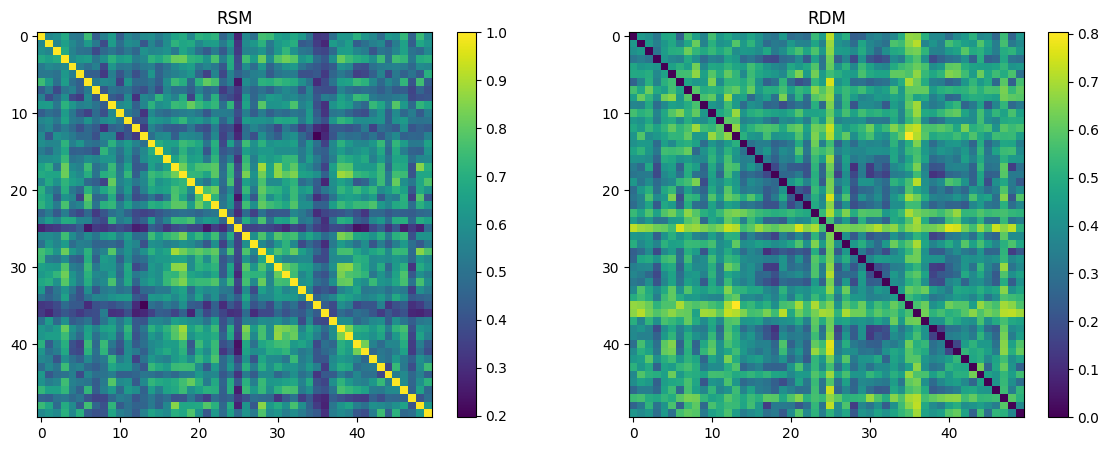

In [13]:
def load_rsm(file_path):
    return np.load(file_path)

def load_rdm(file_path):
    return np.load(file_path)

base_dir = '/home/hmueller2/ibc_code'
rsm_dir = os.path.join(base_dir, 'ibc_output_RA', 'raw', 'topographic_alignment', 'rsm')
rdm_dir = os.path.join(base_dir, 'ibc_output_RA', 'raw', 'topographic_alignment', 'rdm')

rsm_file = os.path.join(rsm_dir, f'topographic_alignment_{subject}.npy')
rdm_file = os.path.join(rdm_dir, f'topographic_alignment_rdm_{subject}.npy')

rsm = load_rsm(rsm_file)
rdm = load_rdm(rdm_file)

print("RSM shape:", rsm.shape)
print("RDM shape:", rdm.shape)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(rsm, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('RSM')

plt.subplot(1, 2, 2)
plt.imshow(rdm, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('RDM')

plt.show()

## MDS Visualization

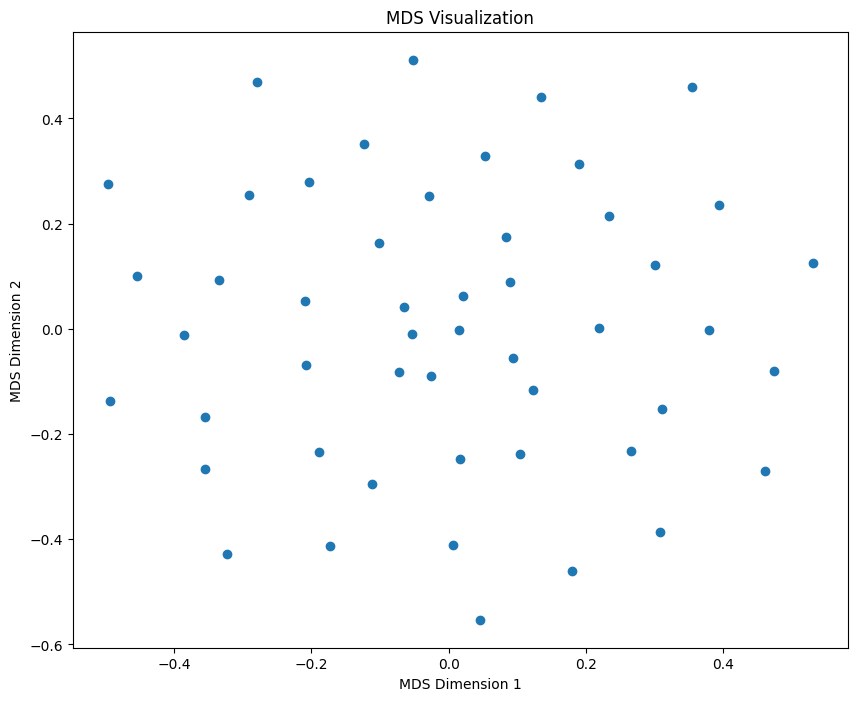

In [14]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(rsm)

plt.figure(figsize=(10, 8))
plt.scatter(mds_coords[:, 0], mds_coords[:, 1])
plt.title('MDS Visualization')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()

## Hierarchical Clustering Visualization

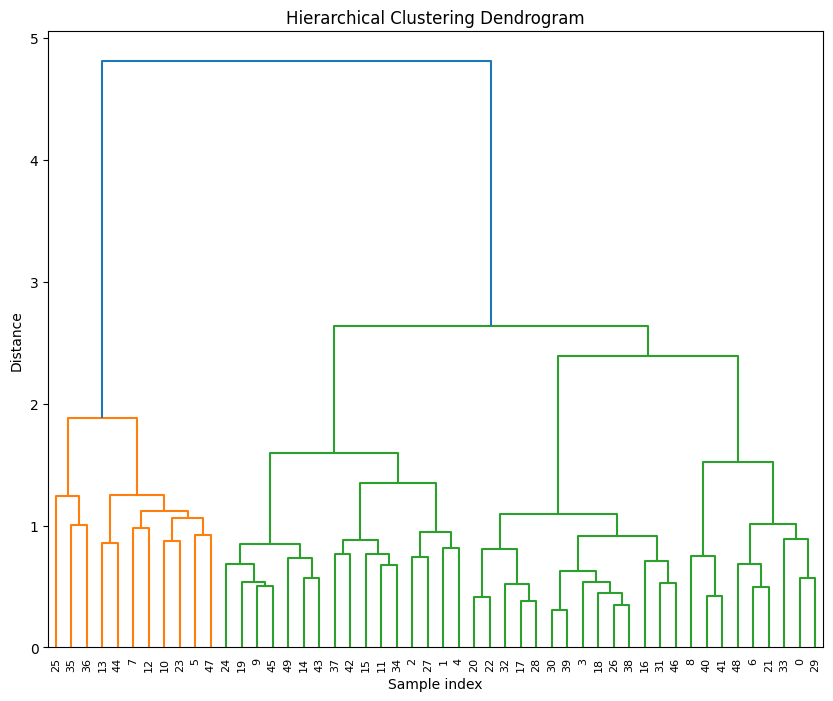

In [15]:
def hierarchical_clustering(data, n_clusters=5):
    Z = linkage(data, method='ward')
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    return labels, Z

labels, Z = hierarchical_clustering(rsm)

plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()